In [1]:
import numpy as np
from scipy.special import sici
import matplotlib.pyplot as plt

In [48]:
def sinc_integral(T,delta_nu,alpha,beta):
    x0 = np.pi * delta_nu * beta
    denom = np.pi * delta_nu * alpha * T
    x = x0 + denom
    #Si(x0+x) - Si(x0)
    Si_x0 = sici(x0)[0]
    Si_x = sici(x)[0]
    return (Si_x - Si_x0)/denom
    

In [77]:
delta_nu = 6e3 #Hz
alpha = 1e-10 #0.1 ns per sec
beta = 50e-6 #50 microsec, arbitrary constant shift

In [92]:
Ts = 10**np.linspace(-2,3,1001)
y1=sinc_integral(Ts,delta_nu,alpha*10000,0)

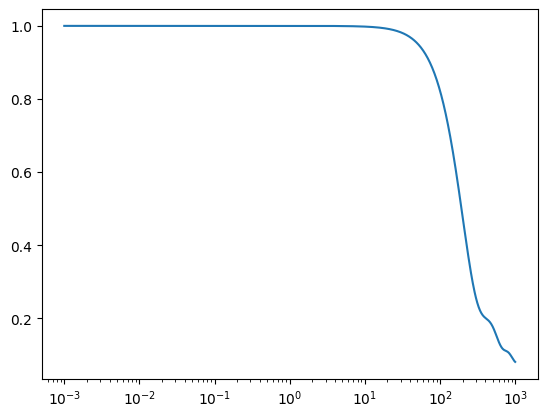

In [91]:
plt.semilogx(Ts,y1)

In [93]:
alphas = 10**np.linspace(-10,-5,1001)
y2 = sinc_integral(60,delta_nu,alphas,0)

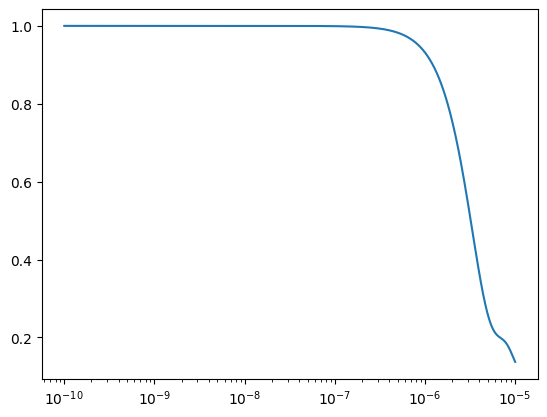

In [89]:
plt.semilogx(alphas,y2)

In [123]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter

In [137]:
Ts = 10**np.linspace(-1,3,10001)
alphas = 10**np.linspace(-10,-5,10001)
Tgrid,algrid=np.meshgrid(Ts,alphas)

In [138]:
fgrid = sinc_integral(Tgrid,delta_nu,algrid,0)

Text(0.5, 1.0, 'Frac. decrease $\\delta S/S$ in correlation magnitude')

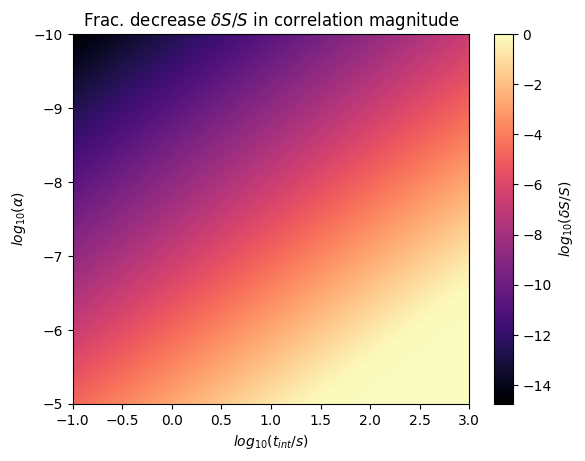

In [160]:
plt.imshow(np.log10(1-fgrid),aspect='auto',extent=[-1,3,-5,-10],vmax=0,cmap='magma')
cbar=plt.colorbar()
cbar.set_label(r"$log_{10}(\delta S/S)$")
plt.xlabel(r"$log_{10}(t_{int}/s)$")
plt.ylabel(r"$log_{10}(\alpha)$")
plt.title("Frac. decrease $\delta S/S$ in correlation magnitude")
# plt.gca().set_xscale('log')
# plt.gca().set_yscale('log')
# plt.gca().xaxis.set_major_formatter(LogFormatter())
# plt.gca().yaxis.set_major_formatter(LogFormatter())

In [127]:
algrid

array([[1.00000000e-08, 1.00000000e-08, 1.00000000e-08, ...,
        1.00000000e-08, 1.00000000e-08, 1.00000000e-08],
       [1.00693167e-08, 1.00693167e-08, 1.00693167e-08, ...,
        1.00693167e-08, 1.00693167e-08, 1.00693167e-08],
       [1.01391139e-08, 1.01391139e-08, 1.01391139e-08, ...,
        1.01391139e-08, 1.01391139e-08, 1.01391139e-08],
       ...,
       [9.86279486e-06, 9.86279486e-06, 9.86279486e-06, ...,
        9.86279486e-06, 9.86279486e-06, 9.86279486e-06],
       [9.93116048e-06, 9.93116048e-06, 9.93116048e-06, ...,
        9.93116048e-06, 9.93116048e-06, 9.93116048e-06],
       [1.00000000e-05, 1.00000000e-05, 1.00000000e-05, ...,
        1.00000000e-05, 1.00000000e-05, 1.00000000e-05]])

In [105]:
10**(-0.25)

0.5623413251903491

In [61]:
np.sinc(delta_nu*16e-6)

0.9849090835795746

In [80]:
1-sinc_integral(60,6e3,1e-8,0)

7.1060879005546695e-06